In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord
cat_path = '/Users/jgreco/Dropbox/share/legacystamps/catalogs/'

In [2]:
# legacy candidates
cat = Table.read(cat_path+'legacy-lsbg-candidates.fits')

# Tycho-2 catlaog from Pickles & Depagne (2010) 
t = Table.read(cat_path+'tycho.fits')
t.rename_column('RAJ2000', 'ra')
t.rename_column('DEJ2000', 'dec')

# mag cut
t = t[t['Vfmag']<11.5]

# position cut
pos_cut = (((t['ra'] > 290) | (t['ra'] < 80)) & (t['dec'] > -21))
pos_cut |= (((t['ra'] < 260) & (t['ra'] > 120)) & (t['dec'] > -10))
t = t[pos_cut]

In [3]:
print(len(t), 'bright stars found')

604225 bright stars found


In [4]:
min_sep = 60 # arcsec

cat_coord = SkyCoord(cat['ra'], cat['dec'], unit='deg')
tycho_coord = SkyCoord(t['ra'], t['dec'], unit='deg')
idx, seps, _ = cat_coord.match_to_catalog_sky(tycho_coord)
print((seps.arcsec < min_sep).sum(), 'candidates near bright stars')

193 candidates near bright stars


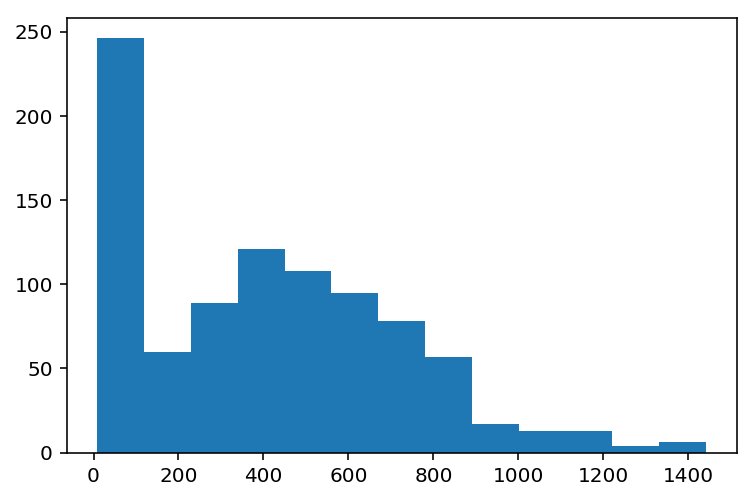

In [5]:
plt.hist(seps.arcsec, bins='auto');

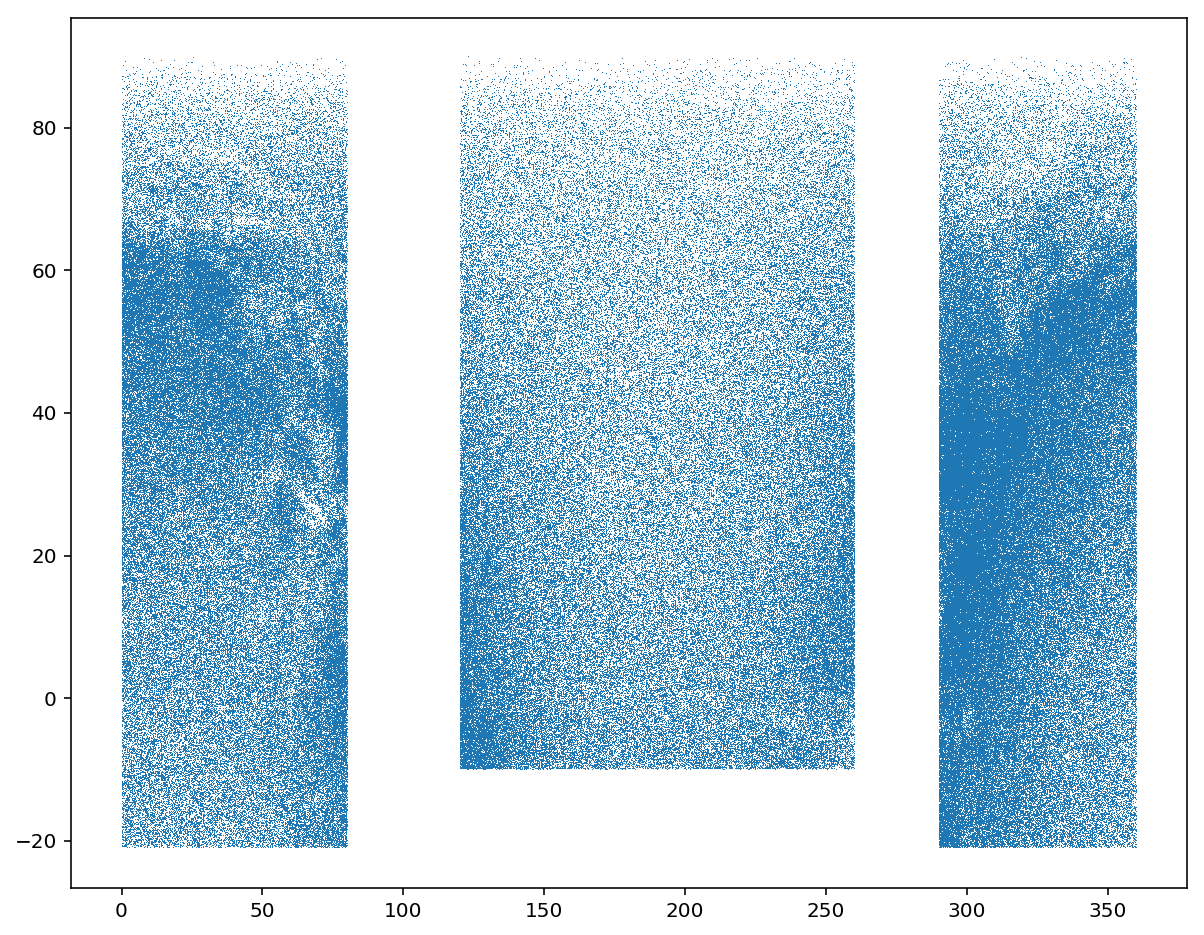

In [6]:
plt.figure(figsize=(10, 8))
plt.plot(t['ra'], t['dec'], ',');